# NÚMEROS PSEUDOALEATORIOS

- Daniel Arana

- Alejandro Adriaensens

In [2]:
import time
import matplotlib.pyplot as plt

In [3]:
def random_time():
    # Obtener el tiempo actual
    timestamp = time.time()

    # Extraer la parte decimal y convertirla a entero
    decimal = int(str(timestamp).split(".")[1])

    return decimal

## MÉTODO DEL CUADRADO MEDIO

En esta implementación, si no se proporciona una semilla inicial, se genera automáticamente utilizando los últimos cuatro dígitos de la marca de tiempo en milisegundos del sistema. Esto asegura que la semilla sea única y varíe en cada ejecución, proporcionando un nivel básico de aleatoriedad inicial.

In [4]:
def serie_random_mcm(cantidad_de_numeros, semilla=None):
    if semilla is None:
        semilla = random_time()
    serie = []

    X = semilla
    for i in range(cantidad_de_numeros):

        #print(X)

        X2 = X**2 #semilla al cuadrado

        longitud_X = len(str(X)) #longitud de la semilla (numero de digitos que se extraeran)
        longitud_X2 = len(str(X2)) #longitud de la semilla al cuadrado

        # posición para cortar los dígitos centrales
        posicion_primer_digito = (longitud_X2 - longitud_X)//2

        # Extraer los dígitos centrales
        nuevo_numero = int(str(X2)[posicion_primer_digito: posicion_primer_digito + longitud_X])

        #serie.append(float(str('0.') + str(nuevo_numero)))
        serie.append(nuevo_numero)

        X = nuevo_numero
    
    return serie

En este caso, se generará una lista de 100 números aleatorios utilizando el método de cuadrados medios y una semilla predeterminada basada en el tiempo. La lista resultante estará almacenada en la variable `numeros_aleatorios_1`.


In [5]:
numeros_aleatorios_1 = serie_random_mcm(100)

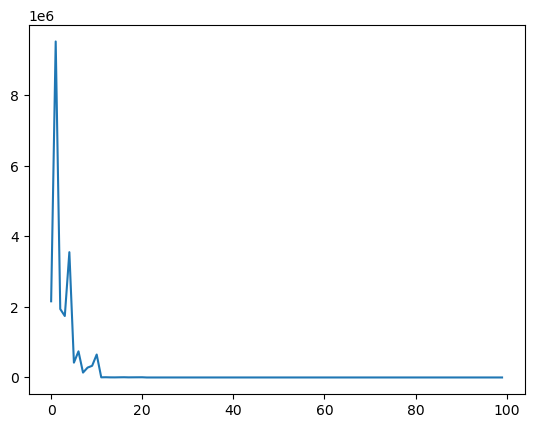

In [6]:
plt.plot(list(range(len(numeros_aleatorios_1))), numeros_aleatorios_1)
plt.show()

La gráfica muestra cómo evolucionan los números generados por el método de cuadrados medios (`numeros_aleatorios_1`) a lo largo de las iteraciones.

- El **Eje X** Representa el índice de cada número generado en la serie, es decir, la posición en la secuencia de 100 números.

- El **Eje Y** Muestra los números generados por el método.

La gráfica confirma que el método de cuadrados medios tiene limitaciones en cuanto a la calidad de los números pseudoaleatorios generados. 

 ## Método de los Cuadrados Medios con Protección y Formato Decimal

A continuación se presenta una implementación mejorada del método de cuadrados medios.

- Si el número generado es menor a 5 dígitos o igual al anterior, se reemplaza con una nueva semilla basada en el tiempo, garantizando mayor variabilidad.

- Además, los números se normalizan al rango [0, 1].




In [8]:
def serie_random_mejorada(cantidad_de_numeros, semilla=None):
    if semilla is None:
        semilla = random_time()
    serie = []

    X = semilla
    for i in range(cantidad_de_numeros):

        #print(X)

        X2 = X**2 #semilla al cuadrado

        longitud_X = len(str(X)) #longitud de la semilla (numero de digitos que se extraeran)
        longitud_X2 = len(str(X2)) #longitud de la semilla al cuadrado

        # posición para cortar los dígitos centrales
        posicion_primer_digito = (longitud_X2 - longitud_X)//2

        # Extraer los dígitos centrales
        nuevo_numero = int(str(X2)[posicion_primer_digito: posicion_primer_digito + longitud_X])

        # si el número es muy pequeñp o si se repite dos veces se actualiza la semilla a partir del tiempo
        if len(str(nuevo_numero)) < 5 or nuevo_numero == X:
            nuevo_numero = random_time()


        serie.append(float(f"0.{nuevo_numero}")) #lo guarda en un rango de 0 a 1

        X = nuevo_numero
    
    return serie

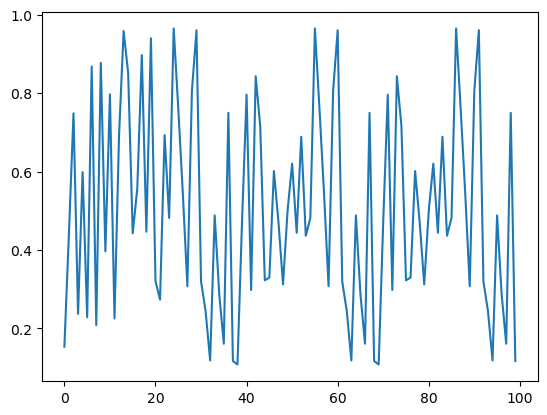

In [9]:
numeros_random = serie_random_mejorada(100)
plt.plot(list(range(len(numeros_random))), numeros_random)
plt.show()